<a href="https://colab.research.google.com/github/DennisCeballos/PruebaRegresionLineal/blob/main/Actividad_Regresion%20Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Estimacion de la Tasa de Incidencia de Enfermedades en Funcion de Factores Ambientales

##Datos usados
La tabla se conforma de las siguientes columnas:
* **contaminacion_aire**, se refiere al nivel de contaminacion del aire y se encuentra medido en PM (materia particulada)
* **temperatura**, se refiere a la temperatura promedio del ambiente y se mide en °C
* **densidad_poblacional**, se refiere a la cantidad de habitantes que hay por km^2
* **acceso_salud**, el cual se refiere a un porcentaje de acceso de la poblacion a un centro de salud
* Y como dato resultado la **tasa_incidencia**, el cual se refiere a el numero de casos que hay por cada 100,000 habitantes



## Pruebas regresion lineal

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd

In [15]:
# Cargar datos
df = pd.read_csv('datos_enfermedades.csv')

# Selección de características y objetivo
X = df[['contaminacion_aire', 'temperatura', 'densidad_poblacional', 'acceso_salud']]
y = df['tasa_incidencia']

In [16]:
X.head()

,contaminacion_aire,temperatura,densidad_poblacional,acceso_salud
0,55,22,1000,85
1,48,25,1500,80
2,65,19,800,90
3,70,30,2000,75
4,30,21,1200,88


In [17]:
y.head()

,tasa_incidencia
0,120
1,150
2,110
3,170
4,130


In [18]:
# División de los datos
# (conjunto de entrenamiento y de prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [19]:
# Realizar Predicciones
y_pred = modelo.predict(X_test)

# Evaluación el modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Error cuadrático medio: {mse}')
print(f'Coeficientes del modelo: {modelo.coef_}')
print(f'Intercepto: {modelo.intercept_}')

Error cuadrático medio: 7.085183138721839
Coeficientes del modelo: [ 0.07163068 -0.52915947  0.05561218 -0.08255806]
Intercepto: 79.21960039435315


---


## Prueba Regresión Lineal con Preprocesamiento
Se busca aplicar método de preprocesamiento (especificamente la normalización o estandarización según sea el caso) sobre los datos X para ver su efecto en los resultados

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd

In [21]:
# Cargar datos
df = pd.read_csv('datos_enfermedades.csv')

# ELIMINACION DE DATOS NULOS O DATOS ANOMALOS

# Para este ejemplo, no fue necesario preparar una limpieza de este tipo
# df = df.dropna()
# df = df.fillna(0)

# ELIMINACION DE DATOS NULOS O DATOS ANOMALOS


# 1. Normalización del nivel de contaminación del aire
scaler_contaminacion = MinMaxScaler()
df['contaminacion_aire_normalizada'] = scaler_contaminacion.fit_transform(df[['contaminacion_aire']])


# 2. Estandarización de la temperatura
scaler_temperatura = StandardScaler()
df['temperatura_estandarizada'] = scaler_temperatura.fit_transform(df[['temperatura']])


# 3. Normalización de la densidad poblacional
scaler_densidad = MinMaxScaler()
df['densidad_poblacional_normalizada'] = scaler_densidad.fit_transform(df[['densidad_poblacional']])


# 4. Transformación de acceso a servicios de salud (de porcentaje a decimal)
df['acceso_salud_decimal'] = df['acceso_salud'] / 100.0


# Selección de características y objetivo
X = df[['contaminacion_aire_normalizada', 'temperatura_estandarizada',
        'densidad_poblacional_normalizada', 'acceso_salud_decimal']]
y = df['tasa_incidencia']


# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Presentar la nueva tabla
print("X :")
print(X.head())

print("y :")
print(y.head())

# Crear modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)


# Predicciones
y_pred = modelo.predict(X_test)


# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Error cuadrático medio: {mse}')
print(f'Coeficientes del modelo: {modelo.coef_}')
print(f'Intercepto: {modelo.intercept_}')

X :
   contaminacion_aire_normalizada  temperatura_estandarizada  \
0                           0.625                  -0.233285   
1                           0.450                   0.641533   
2                           0.875                  -1.108103   
3                           1.000                   2.099563   
4                           0.000                  -0.524891   

   densidad_poblacional_normalizada  acceso_salud_decimal  
0                          0.166667                  0.85  
1                          0.583333                  0.80  
2                          0.000000                  0.90  
3                          1.000000                  0.75  
4                          0.333333                  0.88  
y :
0    120
1    150
2    110
3    170
4    130
Name: tasa_incidencia, dtype: int64
Error cuadrático medio: 7.085183138721619
Coeficientes del modelo: [ 2.86522718 -1.81463897 66.73461002 -8.25580593]
Intercepto: 113.79342489281936


---

**Comparativa:**

- Modelo sin pre-procesamiento

Error cuadrático medio: 7.085183138721839

Coeficientes del modelo: [ 0.07163068 -0.52915947  0.05561218 -0.08255806]

Intercepto: 79.21960039435315


**- Modelo con pre-procesamiento**

Error cuadrático medio: 7.085183138721619

Coeficientes del modelo: [ 2.86522718 -1.81463897 66.73461002 -8.25580593]

Intercepto: 113.79342489281936

---
## Graficas

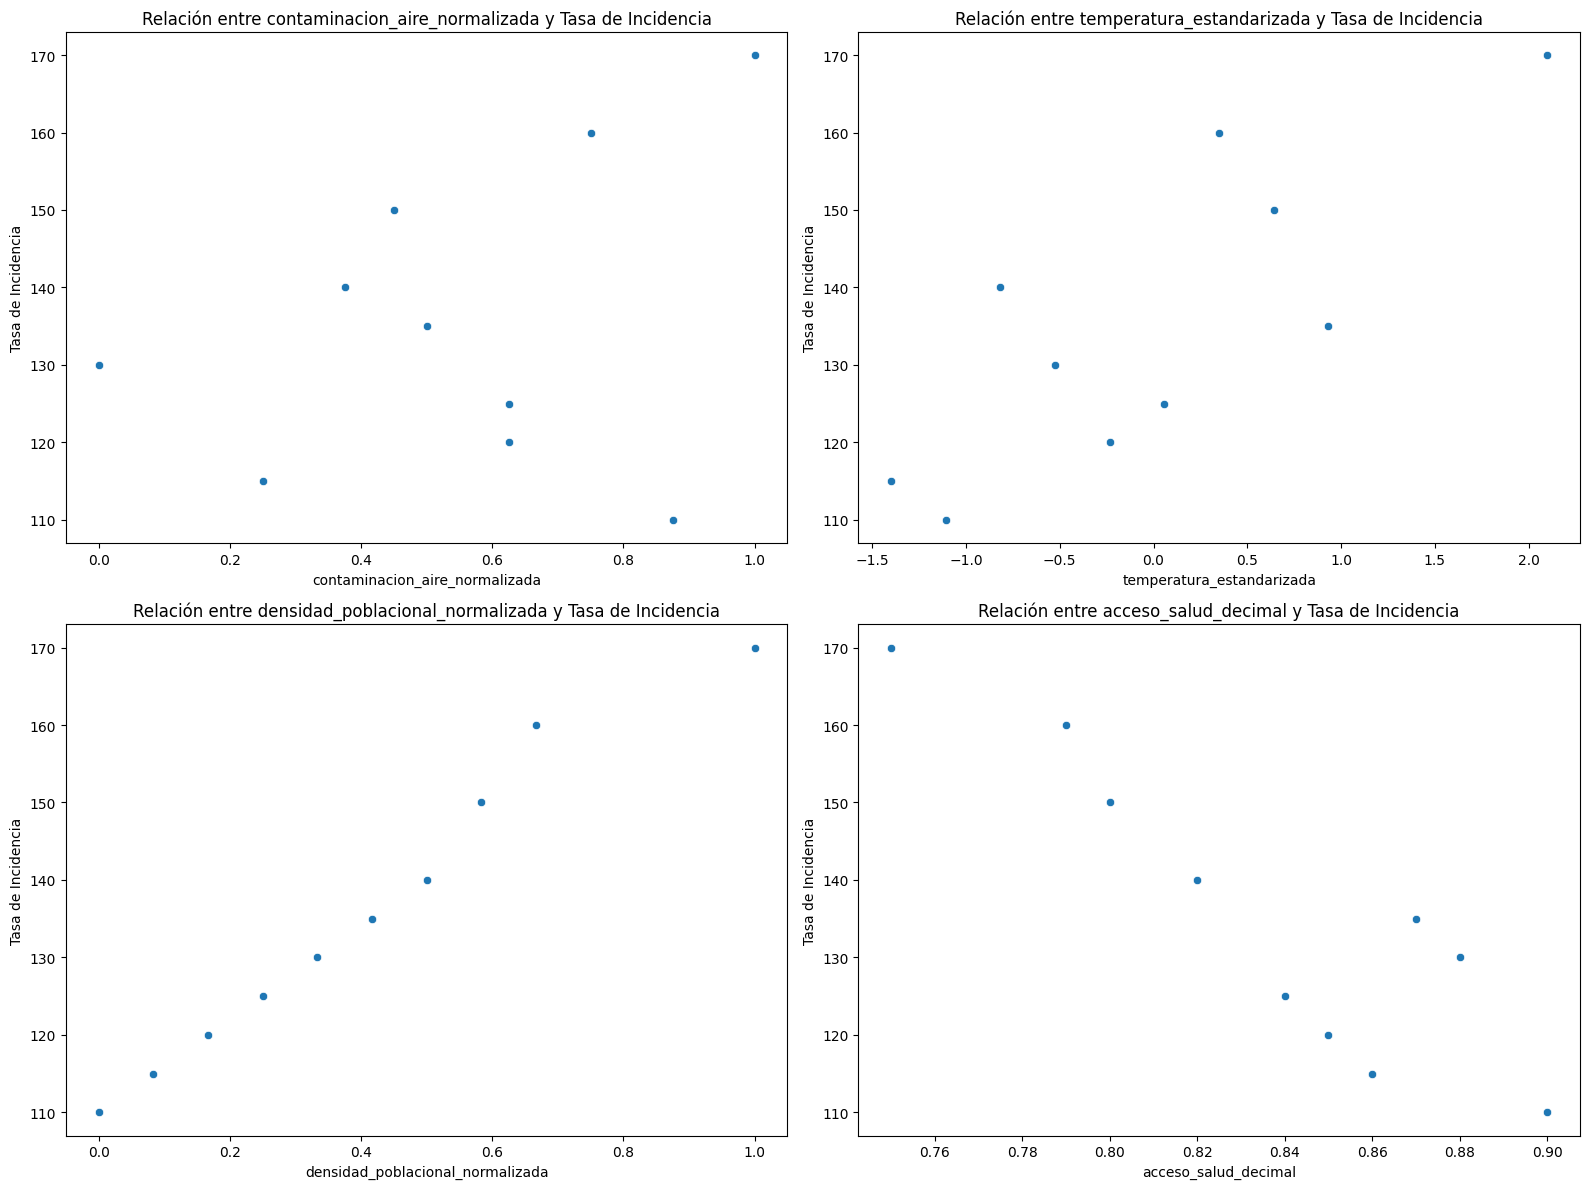

In [22]:
# Codigo para graficar
import matplotlib.pyplot as plt
import seaborn as sns

# Crear gráficos de dispersión para cada variable independiente con respecto a la variable dependiente
# Para los datos no procesados
#variables = ['contaminacion_aire', 'temperatura',
#             'densidad_poblacional', 'acceso_salud']

# Para los datos procesados
variables = ['contaminacion_aire_normalizada', 'temperatura_estandarizada',
             'densidad_poblacional_normalizada', 'acceso_salud_decimal']


plt.figure(figsize=(16, 12))

for i, var in enumerate(variables):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(x=df[var], y=y)
    plt.title(f'Relación entre {var} y Tasa de Incidencia')
    plt.xlabel(var)
    plt.ylabel('Tasa de Incidencia')

plt.tight_layout()
plt.show()
